<h1><b>Statistique en Bioinformatique : </b> TME4 </h1>
<br>
L’objectif de ce TME sont: 
<br>
<ul>
<li> objectif 1 : Utiliser les chaines de Markov pour comprendre les états phénotypiques de cellules cancéreuses.   </li> 
<li> objectif 2 : étudier la dynamique des proportions phénotypiques dans les lignées cellulaires du cancer du sein humain: SUM159 et SUM149</li>
</ul>
<br>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p><b>Soumission</b></p>
<ul>
<li>Renomer le fichier TME3.ipynb pour NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre sur moodle </li>
</div>


Nom etudiant 1 : GUILHON Henri
<br>
Nom etudiant 2 : K.MURALI Sharane
<br>

<h3>Introduction</h3>
<ul>
<li> Les cellules cancéreuses au sein des tumeurs existent souvent dans des états phénotypiques distincts.</li>
<li> Les sous-populations de cellules purifiées pour un état phénotypique reviennent vers des proportions d'équilibre dans le temps.</li>
<li> Cet équilibre peut s'expliquer par un modèle de Markov dans lequel les cellules passent de manière stochastique entre les états.  </li>
</ul>

<img src="img/CellStateTransition.png" />

<b>Exercice 1</b>:
Traduire les graphes de transition de la figure D en matrices de transition, 
$P_{149}$ et $P_{159}$. Verifier bien que les matrices et les vecteur  $\pi_{0}$ soitent normalisés.


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.legend_handler import HandlerLine2D
import random
import math as mt

#distribuition inicialle vecteur pi_0 S, L, B
pi0_149 = np.array([0.039, 0.033, 0.9280])
pi0_159 = np.array([0.019, 0.973, 0.0062])



#matrices 
p_149 = np.array([[0.61, 0.30, 0.09], [0.01, 0.99, 0.00], [0.01, 0.08, 0.90]])


p_159 = np.array([[0.58, 0.07, 0.35], [0.04, 0.47, 0.49], [0.01, 0.00, 0.99]])

#Normaliser les vecteurs π0.




def normalise(m):
    """
    Normalise a matrix
    input1 m: matrix
    output1 mN: normalised matrix
    """
    
    #Initialisation d'une matrice normaliséee
    mN = np.empty(m.shape)
    
    #Cas où la matrice ne contiendrait qu'une ligne
    if len(m.shape)==1:
        for i in range(len(m)):
                mN[i] == m[i]/np.sum(m)
        return mN
    
    #Cas où la matrice contient plusieurs lignes et est en m,m
    for i in range(len(m)):
        for j in range (len(m)):
            #Normalisation sur la ligne
            mN[i][j]=m[i][j]/np.sum(m[i])
        
    return mN

print (normalise(p_149))
#[[0.61       0.3        0.09      ]
# [0.01       0.99       0.        ]
# [0.01010101 0.08080808 0.90909091]]


print (normalise(p_159))
#[[0.58 0.07 0.35]
# [0.04 0.47 0.49]
# [0.01 0.00 0.99]]



[[0.61       0.3        0.09      ]
 [0.01       0.99       0.        ]
 [0.01010101 0.08080808 0.90909091]]
[[0.58 0.07 0.35]
 [0.04 0.47 0.49]
 [0.01 0.   0.99]]


<b>Exercice 2</b>: Déterminer les états stationnaires 
$\pi^\star_{149}$ et $\pi^\star_{159}$. 
Est-ce que les valeurs que vous trouvez sont consistentes avec les 
valeurs experimentales en Fig. 1?

In [2]:
#You can use the function numpy.linalg.eig
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

mat = np.array([[1, 2], [20, 60]])
eigenvalues, eigenvectors = np.linalg.eig(mat)

#print (eigenvalues,"\n" ,eigenvectors)

def star(mat):
    eival,eivect = np.linalg.eig(normalise(mat).T)
    for  i in range(len(eival)):
        if abs(eival[i]-1)<0.0000000001:
            return eivect[:,i]/np.sum(eivect[:,i])

pi_star_149 = star(p_149)
pi_star_159 = star(p_159)

print ("Pi star 149 " , pi_star_149)
print ("Pi star 159 " , pi_star_159)

#Pi star 149  [0.02500625 0.95023756 0.02475619]
#Pi star 159  [0.0234721  0.00310009 0.97342781]


Pi star 149  [0.02500625 0.95023756 0.02475619]
Pi star 159  [0.0234721  0.00310009 0.97342781]


<b>Exercice 3</b>: Déterminer les matrices de transition $P_{149}^n$ et $P_{159}^n$ pour $n$ 
iterations avec $n=2,4,8,16,32,64$, imprimer toutes les matrices. Computer les vectors $\pi^{(n)}$ et les comparer avec
$\pi^\star_{149,159}$. Utilisez le $\pi^0$ du papier de Gupta, page 2, ci-dessous.

In [55]:
pi_zero_149 = np.array([[0.039, 0.928, 0.033]])
pi_zero_159 = np.array([[0.019, 0.0062, 0.973]])


#matrice P**n
def matTransN(P, n):
    """
    Compute the transition matrix after N iterations
    input1 P: matrix
    input2 n: number of iterations
    output Pn: transition matrix after N iterations
    """
    
    #Matrice P normalisée 
    Pnorm = normalise(P)
    
    #Matrice de transition normalisée
    Pn = normalise(P)
    
    for i in range(n):
        #Produit matriciel
        Pn = Pn@Pnorm
    return Pn

#matrice P**n where n = 2,4,8,16,32,64
def printMat(P, n, pi_0, M_name):
    """
    Print all P**n matrices, where n in  {2,4,8,16,32,64, ...}  
    input1 P: matrix
    input2 n: number of iterations
    input3 pi_0: initial condition
    input4 M_name: matrix identifier
    output: None
    
    """
    
    #Liste des 2**i 
    liste = [2**i for i in range(1,n)]
    
    #Afficahge nom de la matrice
    print("Matrice "+str(M_name)+"\n")
    
    #Afficahge de la condition initiale
    print("Pi0 : "+str(pi_0)+"\n")
    
    for i in range(n+1):
        #Si i est un puissance de 2
        if i in liste:        
            
            #Calcul et affichage de la matrice de transition au temps i
            m = matTransN(P,i)
            print("\n")
            print("Matrice pour P puissance "+str(i)+"\n")
            print(m)
            print("\n")

            #Affichage de la condidtion au temps i
            print("Pi"+str(i)+"\n")
            print(pi_0@m)
            

    
#print(matTransN(normalise(p_149),1000))
print (printMat(p_149, 2, pi_zero_149, '149'))
print (printMat(p_159, 2, pi_zero_159, '159'))

Matrice 149

Pi0 : [[0.039 0.928 0.033]]



Matrice pour P puissance 2

[[0.23561926 0.60625066 0.15813007]
 [0.01960009 0.97814173 0.00225818]
 [0.01977503 0.22663    0.75359497]]


Pi2

[[0.02803061 0.93883809 0.0331313 ]]
None
Matrice 159

Pi0 : [[0.019  0.0062 0.973 ]]



Matrice pour P puissance 2

[[0.207544 0.058534 0.733922]
 [0.043444 0.108422 0.848134]
 [0.01897  0.001428 0.979602]]


Pi2

[[0.0226705  0.00317381 0.97235569]]
None


<b> Exercice 4 </b>:
 Ecrire une fonction pour déterminer les
$(\pi^{(t)})_{t=1:n}$ d'une chaine de Markov à trois états. Appliquer
pour $P_{149}$ et $P_{159}$, pour les conditions initiales 
$\pi^{(0)}\in\{ (0.998,0.001,0.001), (0.001,0.998,0.001), 
(0.001,0.001,0.998) \}$ et pour $n=20$ itérations de la chaine 
de Markov. Visualiser graphiquement les résultats.


In [56]:

def Pi_n(pi_0, P, n):
    """
    Compute Pi_n = Pi_0*P^n
    input1 pi_0: intial condition
    input2 P: transition matrix
    input3 n: number of iterations
    output Pi_n
    """
    
    #Calcul de Pi_n : produit matriciel entre Pi_0 et la matrice de transition àu temps n
    return pi_0@matTransN(P,n) 


In [57]:
def List_Pi_n(pi0, P, n):
    """
    Compute a list of  Pi_n
    input1 pi_0: intial condition
    input2 P: transition matrix
    input3 n: number of iterations
    output liste_M_trans: list
    """
    
    #Initialisation de la liste vide 
    liste_Pi_n=[]
    
    #Parcours sur le nombre d'itérations
    for i in range(n):
        #Ajout de Pi_i dans la liste
        liste_Pi_n.append(Pi_n(pi0,P,i))
    
    #Conversion de np.array
    return np.array(liste_Pi_n)


In [58]:
def plot(liste_Pi_n):
    """
    Plot liste_Pi_n
    """
    
    #création d'un array avec le nombre d'iterations
    lenarray = np.arange(0,len(liste_Pi_n),1)
    
    #Parcours sur le nombre d'états
    for i in range(len(liste_Pi_n[0])):
        #Plot de chaque état
        plt.plot(lenarray,liste_Pi_n[:,i],label = str(i))
        plt.legend()

    plt.show()


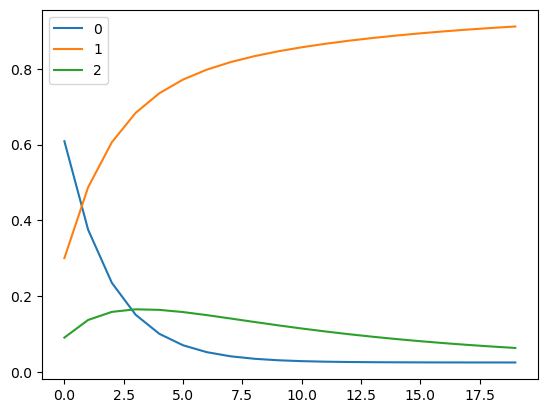

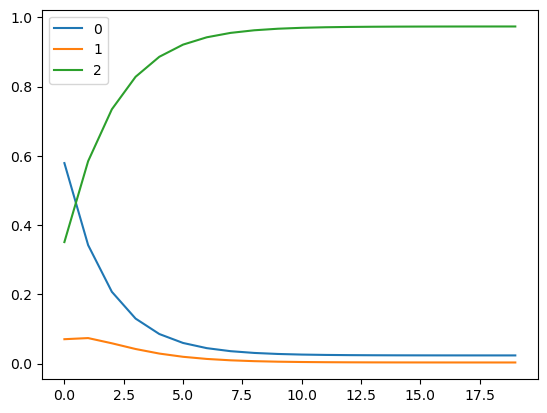

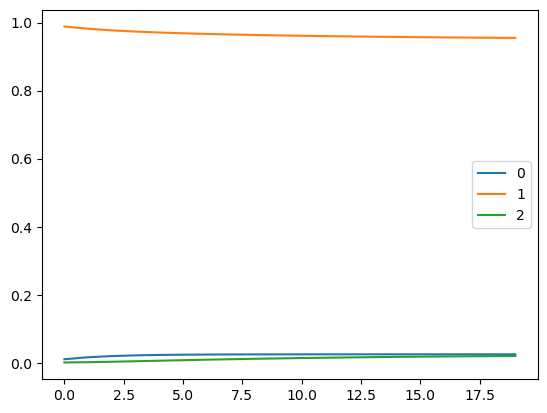

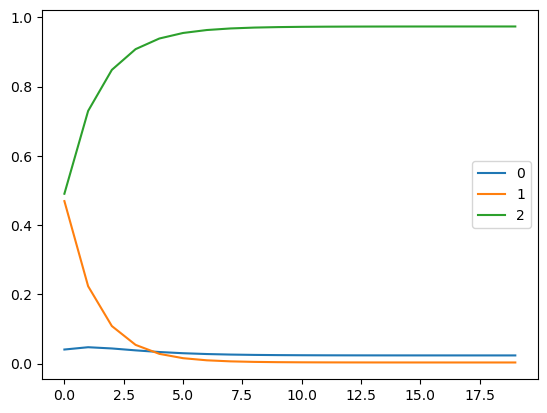

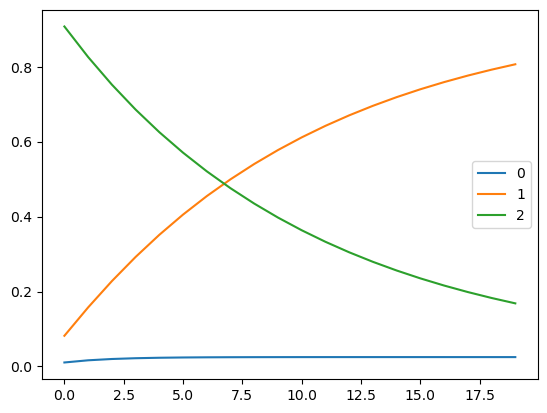

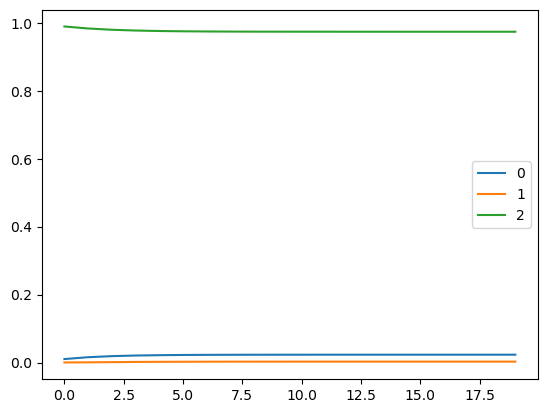

In [59]:
pi1 = np.array([0.998,0.001,0.001])
pi2 = np.array([0.001,0.998,0.001])
pi3 = np.array([0.001,0.001,0.998])

plot(List_Pi_n(pi1, p_149, 20))
plot(List_Pi_n(pi1, p_159, 20))

plot(List_Pi_n(pi2, p_149, 20))
plot(List_Pi_n(pi2, p_159, 20))

plot(List_Pi_n(pi3, p_149, 20))
plot(List_Pi_n(pi3, p_159, 20))


<b> Exercice 5 </b>:
Ecrire une fonction pour simuler la trajectoire stochastique
$(x_t)_{t=0:n}$ d'une seule réalisation de la chaiine de Markov. 
Créer des population de $N=10,100,1000,10000$ trajectoires. Estimer 
la trajectoire moyenne de chaque population.


In [61]:
def Trajectoire (n, Pi_0, P):
    """
    simulate the stochastic trajectory
    input1 n: number of iterations
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    output Traj: list of states that simulates the stochastic trajectory ['S', 'B', 'L']
    """
    
    #Initialisation de la liste de la trajectoire
    Traj = []
    
    #Liste d'états
    state = ['S','B','L']
    
    #Parcours sur le nombre d'itérations
    for i in range(n):
        #Si condition initiale
        if i == 0:
            for j in range(len(Pi_0)):
                y = np.random.rand()
                
                #Ajout de l'état en fonction de la proba de y et sa comparaision
                if y<min(Pi_0):
                    Traj.append(state[np.argmin(Pi_0)])
                elif y>=max(Pi_0):
                    Traj.append(state[np.argmax(Pi_0)])
                else:
                    #Liste ne contentant que la lettre restante sans argmin et argmax<
                    cord = [i for i in state if (i!=state[np.argmin(Pi_0)] and i!=state[np.argmax(Pi_0)])]
                    Traj.append(cord[0])
        
        #Si non condition initiale
        if i>0:
            #Récupération de la ligne dans P correspondant à l'état précédent
            P_instant = P[state.index(Traj[i-1])]
            for j in range(len(P_instant)):
                y = np.random.rand()
                
                #Ajout de l'état en fonction de la proba de y et sa comparaision
                if y<min(P_instant):
                    Traj.append(state[np.argmin(P_instant)])
                elif y>=max(P_instant):
                    Traj.append(state[np.argmax(P_instant)])
                else:
                    #Liste ne contentant que la lettre restante sans argmin et argmax<
                    cord = [i for i in state if (i!=state[np.argmin(P_instant)] and i!=state[np.argmax(P_instant)])]
                    Traj.append(cord[0])
        
    return Traj 

#Déterminer une trajectoire pour N population.
def Trajectoire_P(n, Pi_0, P, N):
    """
    Simulate a trajectory for N population.
    input1 n: number of iterations
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    input3 N: population size
    output TrajP: trajectory
    """
    TrajP=[]
    
    for i in range(N):
        TrajP.append(Trajectoire(n,Pi_0,P))

    return TrajP
    

#Estimer la trajectoire moyenne d'une chaine de markov pou N

def Trajectoire_moy(n, Pi_0, P, N):
    """
    Find the mean tragetoire
    input1 n: number of iterations
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    input3 N: population size
    output TrajMoy: mean trajectory
    """
    
    #Array vide pour stocker les valeurs de trajectoire moyenne
    TrajMoy = np.zeros((3,n))
    
    #Calcul des trajectoires pour N populations
    trajN = Trajectoire_P(n,Pi_0,P,N)
    
    #Parcours sur le nombre d'itération
    for i in range(n):
        #Liste pour stocker les états au temps i
        listemp = []
        
        #Parcours sur le nombre de populations
        for j in range(N): 
            listemp.append(trajN[j][i])
        
        #Capture des occurences de chaque état
        occ = {state: listemp.count(state) for state in listemp}
        
        #Calcule des trajectoires noyennes
        for c in occ:
            if c=='S':
                TrajMoy[0,i]=occ[c]/N
            if c=='B':
                TrajMoy[1,i]=occ[c]/N
            if c=='L':
                TrajMoy[2,i]=occ[c]/N
        
    return TrajMoy

#Visualiser graphique des trajectoires.
def plotTrajectory(t):
    """
    Plot Trajectory
    input1 t: trajectory
    """

    #Liste d'états
    state = ['S','B','L']

    #Array du nombre d'itération
    lenarray = np.arange(0,len(t[0]),1)
    
    #Parcours sur le nombre d'états
    for i in range(len(t)):
        #Affichage de chaque état
        plt.plot(lenarray,t[i,:],label = state[i])
        plt.legend()
    plt.show()

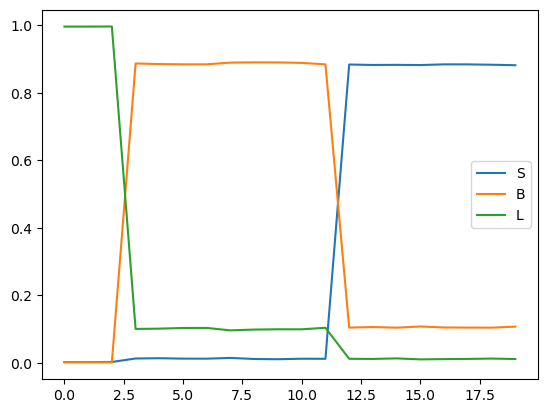

In [46]:
plotTrajectory(Trajectoire_moy(20, pi1, p_149, 10000))

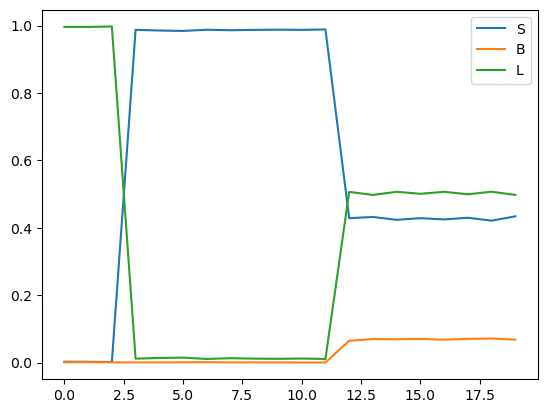

In [47]:
plotTrajectory(Trajectoire_moy(20, pi1, p_159, 10000))

<b> Exercice 6 </b>: 
Ecrire une fonction pour calculer la probabilité d'une trajectoire
$(x_t)_{t=0:n}$. Pour y facilite vous devez applique le log et utlise la some au
lieu du product.  Ensuite vouz devez comparer les probabilités de 
deux chaiines de Markov $P_{149}$ et $P_{159}$. Visualiser les histogrammes pour les deux populations de taille $N=10000$ (géenérées avec $P_{149}$ et $P_{159}$). Est-ce que vous observez des différences entre les deux modèles? Comment est-ce que vous expliquer cettes différences?

/tmp/ipykernel_3524/2689644891.py:16: RuntimeWarning: divide by zero encountered in log
  val = np.log(P[state.index(Traj[i-1]),state.index(Traj[i])])


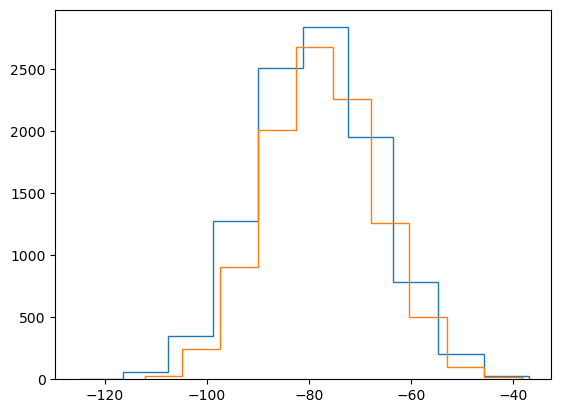

In [53]:
#Calculer la probabilité d’une trajectoire (xt)t=0:n
def Pb_Trajectoire(Traj, Pi_0, P): 
    """
    Compute the probability of a trajectory
    input1 Traj: a trajectory
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    output Proba: ptobability
    """
    
    #Initialisation de la valeur proba
    Proba = 0
    
    #Liste des états
    state = ['S','B','L']
    
    #Parcours sur le nombre d 'itérations
    for i in range(len(Traj)):
        #Si condition initiale
        if i==0:
            Proba += np.log(Pi_0[state.index(Traj[i])])
        
        #Si non condition initiale
        if i>0:
            val = np.log(P[state.index(Traj[i-1]),state.index(Traj[i])])
            #Si la valeur tend vers - infini
            #A MODIFIER HENRI, J'AI OUBLIÉ COMMENT OPTI CA
            if val != -np.inf:
                Proba += val
    return Proba


def Histo (Trajs, Pi_0, P):
    """
    compute a histogramm of Trajectory probabilities
    input1 Trajs: a trajectory population
    input2 Pi_0: initial condition
    input3 P: transtion matrix  
    output pop: a list of probabilities
    """
    
    #Initialisation de la liste de population pour l'histogramme
    pop = []
    
    #Pour chaque population
    for i in range(len(Trajs)):
        #Calcul de la probabilité de chaque trajectoire et ajout dans la liste
        pop.append(Pb_Trajectoire(Trajs[i],Pi_0,P))

    return pop

def plotHist(Histo149, Histo159):
    """
    Plot two probabilities histogram
    input1 Histo149: a list of probabilities for P149
    input1 Histo159: a list of probabilities for P159
    """
    
    #Création des histogramme pour 149 et 159
    counts1, bins1 = np.histogram(Histo149)
    counts2, bins2 = np.histogram(Histo159)

    #Plot
    plt.stairs(counts1, bins1)
    plt.stairs(counts2, bins2)
    
    #Affichage
    plt.show()


#-------------------------------------------------------------
plotHist(Histo(Trajectoire_P(20, pi0_149, p_149, 10000),pi0_149, p_149), Histo(Trajectoire_P(20, pi0_159, p_159, 10000),pi0_159, p_159))
